In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/SalaryData/SalaryData_Test(1).csv
/kaggle/input/SalaryData/SalaryData_Train(1).csv


In [3]:
# df_train = pd.read_csv('D:\DS Files\Assignments\Support Vector Machine\SalaryData_Train(1).csv')

#from google.colab import files
#uploaded = files.upload()


In [4]:
df_train = pd.read_csv("/kaggle/input/SalaryData/SalaryData_Test(1).csv")
df_train.shape

(15060, 14)

In [5]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [7]:
df_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
df_train.duplicated().sum()

930

In [9]:
df_train = df_train.drop_duplicates()
df_train.duplicated().sum()

0

In [10]:
df_train.shape

(14130, 14)

In [11]:
df_train.nunique()

age               73
workclass          7
education         16
educationno       16
maritalstatus      7
occupation        14
relationship       6
race               5
sex                2
capitalgain      110
capitalloss       79
hoursperweek      89
native            40
Salary             2
dtype: int64

In [12]:
for col in df_train.columns.values:
  print(col, end="\n\n")
  print(df_train[col].unique(), end="\n\n ***********************************\n\n")

age

[25 38 28 44 34 63 24 55 65 36 26 48 43 20 37 45 22 23 54 32 46 56 17 29
 39 52 18 21 42 33 30 47 41 19 69 50 31 59 49 58 40 27 57 61 51 73 53 80
 62 35 72 64 68 66 60 67 71 70 90 77 81 74 78 82 75 85 76 89 83 79 88 87
 84]

 ***********************************

workclass

[' Private' ' Local-gov' ' Self-emp-not-inc' ' Federal-gov' ' State-gov'
 ' Self-emp-inc' ' Without-pay']

 ***********************************

education

[' 11th' ' HS-grad' ' Assoc-acdm' ' Some-college' ' 10th' ' Prof-school'
 ' 7th-8th' ' Bachelors' ' Masters' ' 5th-6th' ' Assoc-voc' ' 9th'
 ' Doctorate' ' 12th' ' 1st-4th' ' Preschool']

 ***********************************

educationno

[ 7  9 12 10  6 15  4 13 14  3 11  5 16  8  2  1]

 ***********************************

maritalstatus

[' Never-married' ' Married-civ-spouse' ' Widowed' ' Separated'
 ' Divorced' ' Married-spouse-absent' ' Married-AF-spouse']

 ***********************************

occupation

[' Machine-op-inspct' ' Farming-fishing' ' Prot

In [13]:
print(df_train["education"].value_counts())
print(df_train["educationno"].value_counts())

 HS-grad         4473
 Some-college    3014
 Bachelors       2369
 Masters          864
 Assoc-voc        634
 11th             542
 Assoc-acdm       493
 10th             395
 7th-8th          265
 Prof-school      241
 9th              219
 12th             194
 Doctorate        168
 5th-6th          161
 1st-4th           71
 Preschool         27
Name: education, dtype: int64
9     4473
10    3014
13    2369
14     864
11     634
7      542
12     493
6      395
4      265
15     241
5      219
8      194
16     168
3      161
2       71
1       27
Name: educationno, dtype: int64


In [14]:
df_train = df_train.drop(["education"], axis=1)
print(df_train.shape)
df_train.columns

(14130, 13)


Index(['age', 'workclass', 'educationno', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalgain', 'capitalloss',
       'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [15]:
df_train['capitalgain'] =  df_train['capitalgain'].replace([ 99999 ] , 0)

<AxesSubplot:xlabel='capitalloss'>

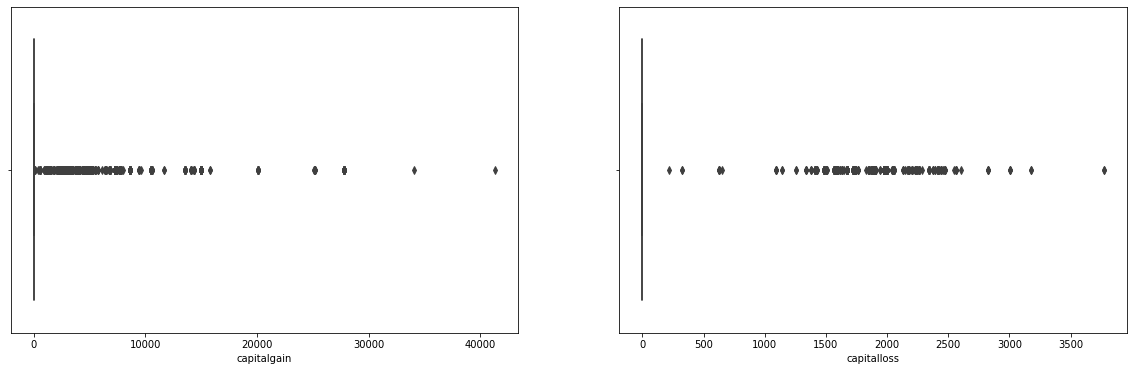

In [16]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.boxplot(x=df_train["capitalgain"])
plt.subplot(1,2,2)
sns.boxplot(x=df_train["capitalloss"])

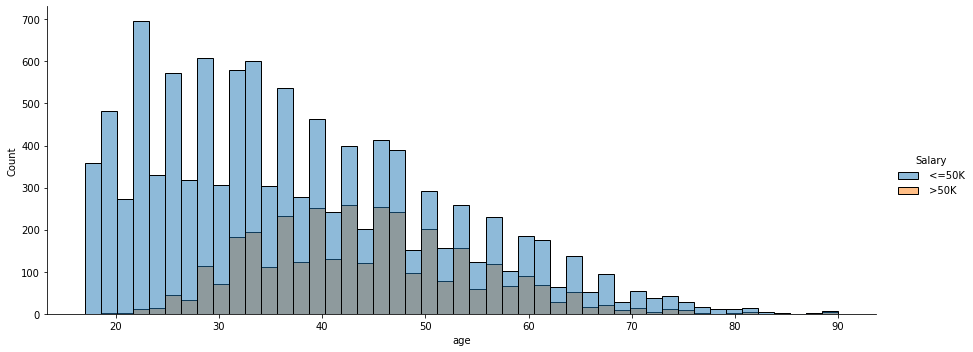

In [17]:
sns.displot(df_train, x='age', hue='Salary', aspect=20/8)

<AxesSubplot:>

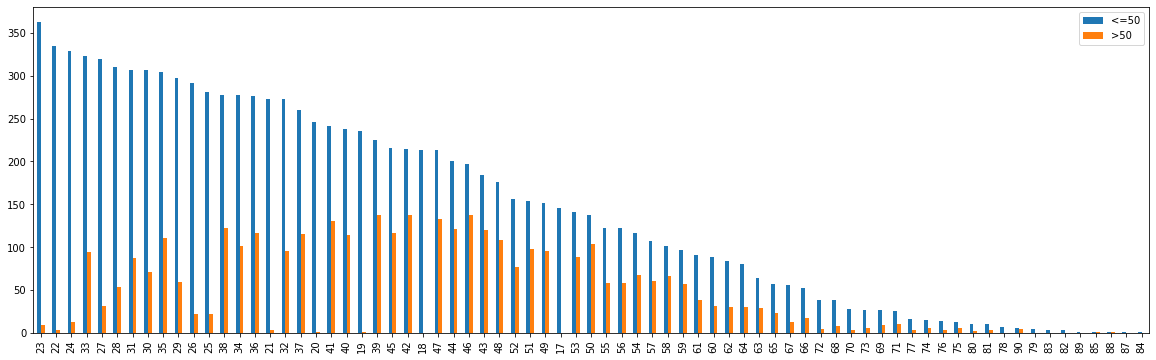

In [18]:
temp_df = pd.DataFrame()
temp_df['<=50'] = df_train[df_train['Salary'] == ' <=50K']['age'].value_counts()
temp_df['>50'] = df_train[df_train['Salary'] == ' >50K']['age'].value_counts()
temp_df.plot.bar(figsize=(20,6))

<AxesSubplot:>

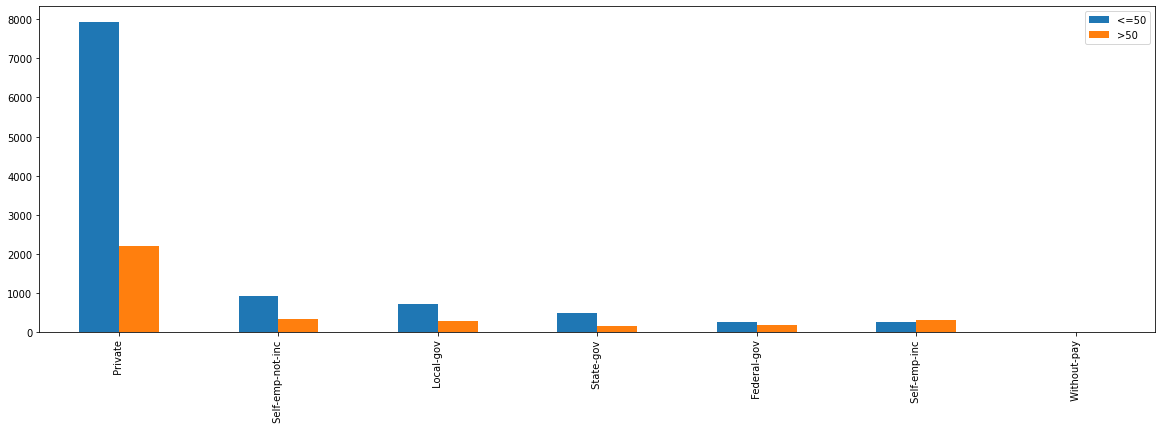

In [19]:
temp_df = pd.DataFrame()
temp_df['<=50'] = df_train[df_train['Salary'] == ' <=50K']['workclass'].value_counts()
temp_df['>50'] = df_train[df_train['Salary'] == ' >50K']['workclass'].value_counts()
temp_df.plot.bar(figsize=(20,6))

<AxesSubplot:xlabel='hoursperweek', ylabel='Density'>

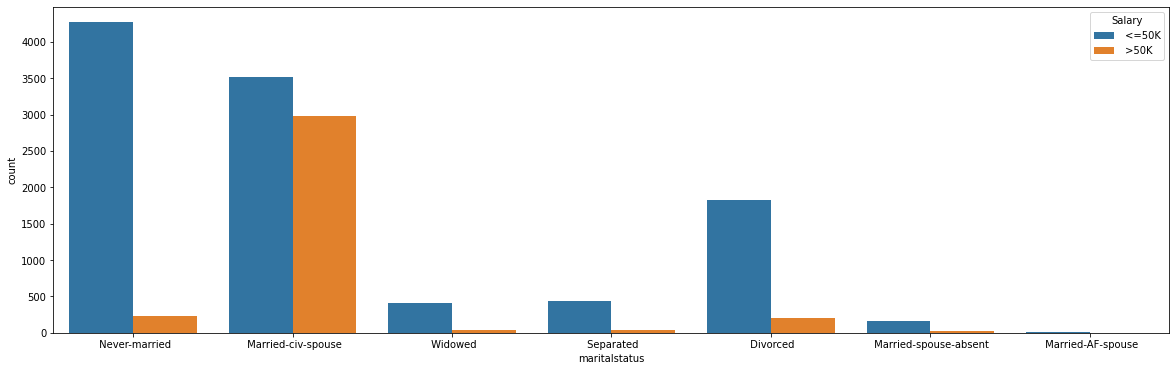

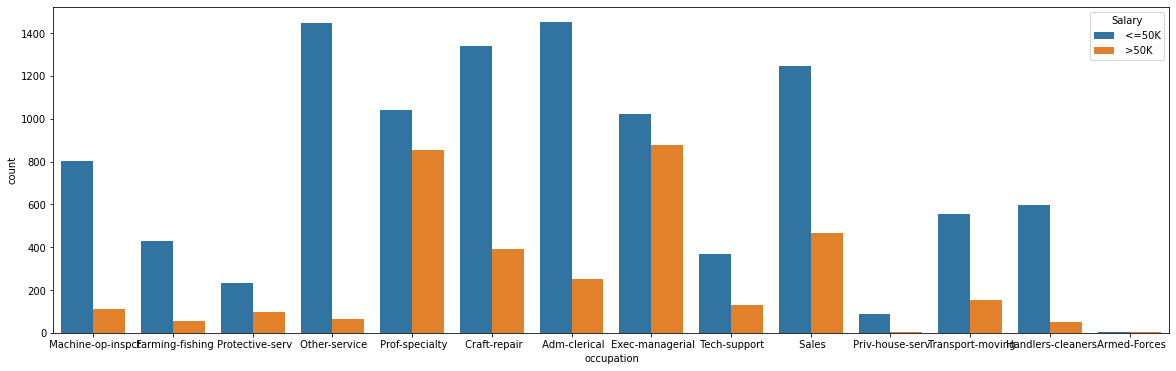

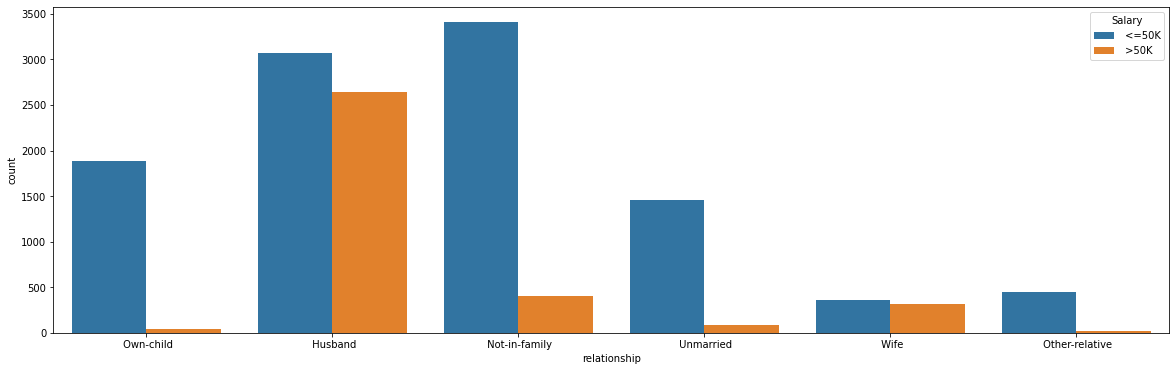

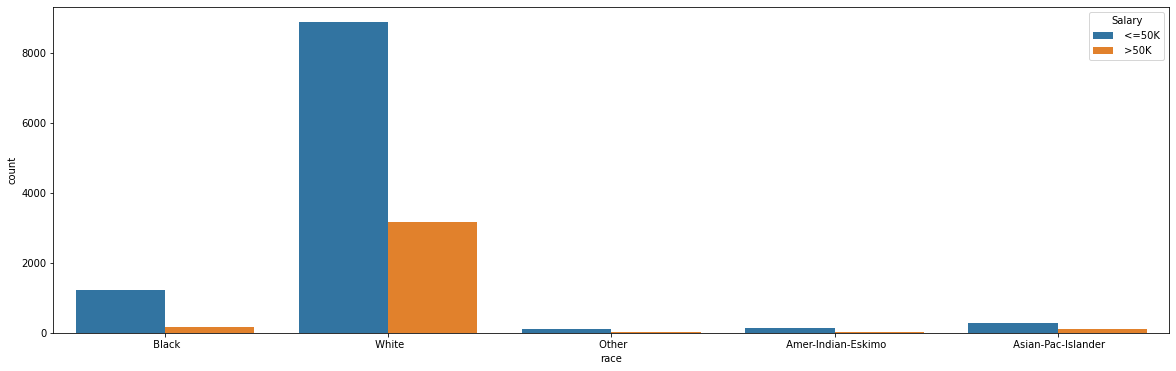

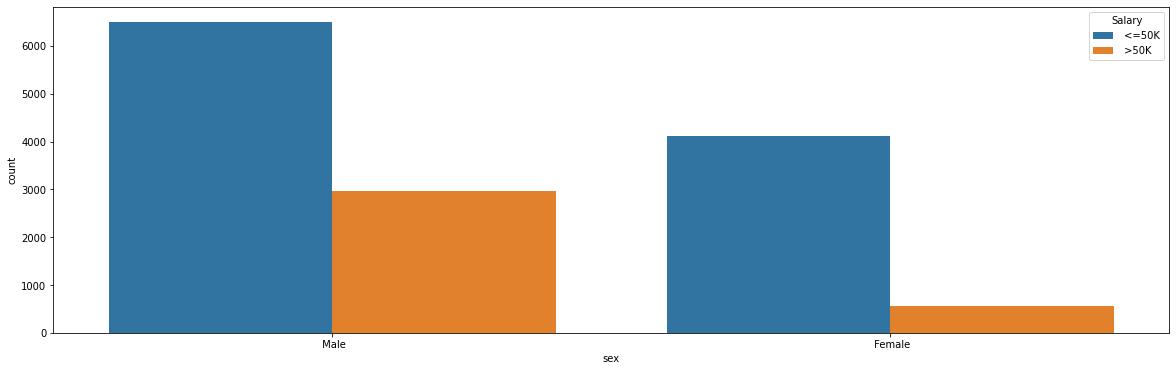

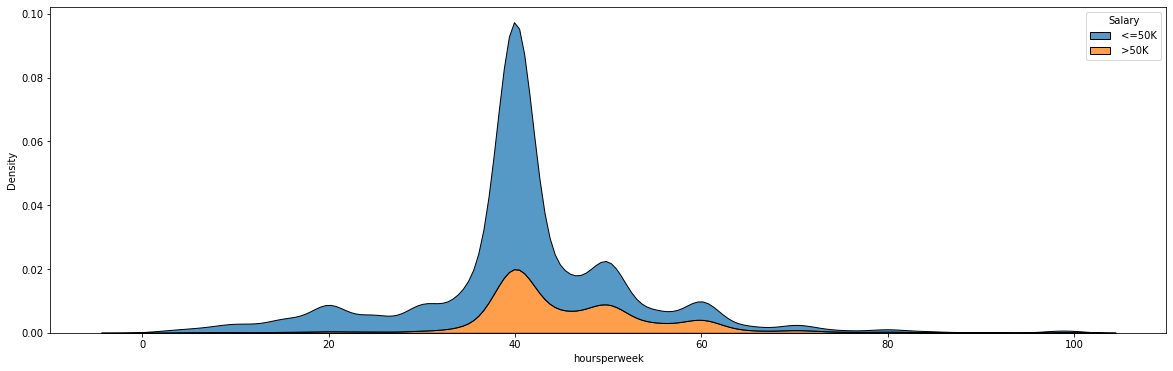

In [20]:

plt.figure(figsize=(20,6))
sns.countplot(x=df_train['maritalstatus'],hue=df_train['Salary'])
plt.figure(figsize=(20,6))
sns.countplot(data=df_train, x='occupation', hue='Salary')
plt.figure(figsize=(20,6))
sns.countplot(data=df_train, x='relationship', hue='Salary')
plt.figure(figsize=(20,6))
sns.countplot(data=df_train, x='race', hue='Salary')
plt.figure(figsize=(20,6))
sns.countplot(data=df_train, x='sex', hue='Salary')
plt.figure(figsize=(20,6))
sns.kdeplot(data=df_train, x='hoursperweek', hue='Salary', multiple="stack")

<AxesSubplot:>

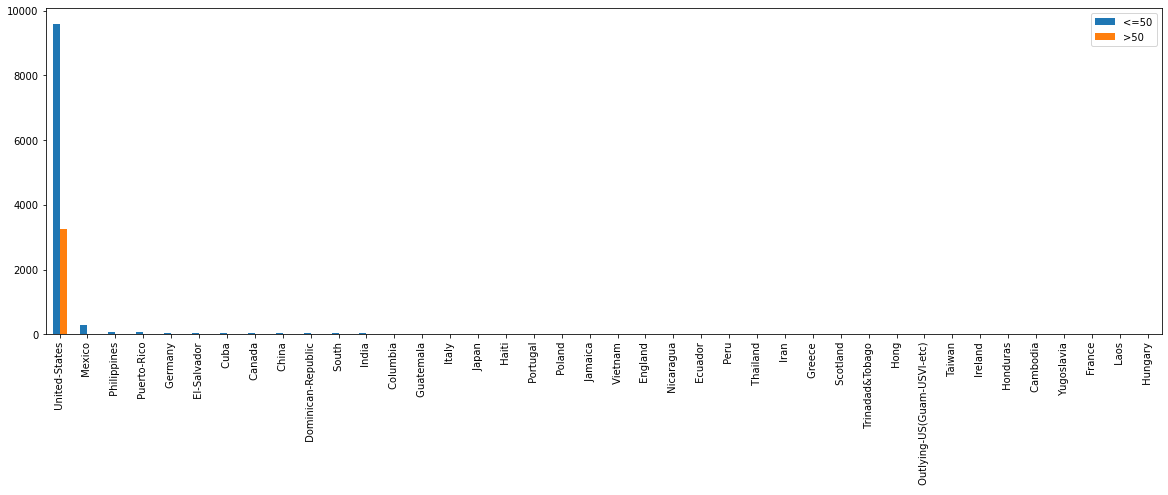

In [21]:
temp_df = pd.DataFrame()
temp_df['<=50'] = df_train[df_train['Salary'] == ' <=50K']['native'].value_counts()
temp_df['>50'] = df_train[df_train['Salary'] == ' >50K']['native'].value_counts()
temp_df.plot.bar(figsize=(20,6))

In [22]:
df_train.head()
from sklearn import preprocessing 

df = df_train.copy()
label_encoder = preprocessing.LabelEncoder()
df["workclass"]=label_encoder.fit_transform(df["workclass"])
df["maritalstatus"]=label_encoder.fit_transform(df["maritalstatus"])
df["sex"]=label_encoder.fit_transform(df["sex"])
df["race"]=label_encoder.fit_transform(df["race"])
df["occupation"]=label_encoder.fit_transform(df["occupation"])
df["relationship"]=label_encoder.fit_transform(df["relationship"])
df["native"]=label_encoder.fit_transform(df["native"])
df["Salary"]=label_encoder.fit_transform(df["Salary"])

df.head(10)

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,7,4,6,3,2,1,0,0,40,37,0
1,38,2,9,2,4,0,4,1,0,0,50,37,0
2,28,1,12,2,10,0,4,1,0,0,40,37,1
3,44,2,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,6,4,7,1,4,1,0,0,30,37,0
5,63,4,15,2,9,0,4,1,3103,0,32,37,1
6,24,2,10,4,7,4,4,0,0,0,40,37,0
7,55,2,4,2,2,0,4,1,0,0,10,37,0
8,65,2,9,2,6,0,4,1,6418,0,40,37,1
9,36,0,13,2,0,0,4,1,0,0,40,37,0


In [23]:
X=df.iloc[:,0:12]
Y=df.iloc[:,12]

In [24]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=7, stratify=Y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((11304, 12), (11304,), (2826, 12), (2826,))

In [26]:
clf=SVC()
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 78.98089171974523


array([[2100,   24],
       [ 570,  132]])

In [27]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

num_folds = 10
seed = 7
scoring = 'accuracy'
#c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0,2.2,2.5]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']

param_grid = dict(kernel=kernel_values)  #Regularization parameter. The strength of the regularization is inversely proportional to C
model = SVC()

kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    scoring=scoring,
                    cv=kfold, verbose=10)

grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" %
      (grid_result.best_score_, grid_result.best_params_))

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV 1/10; 1/4] START kernel=linear..............................................
[CV 1/10; 1/4] END ...............kernel=linear;, score=0.809 total time=   4.9s
[CV 2/10; 1/4] START kernel=linear..............................................
[CV 2/10; 1/4] END ...............kernel=linear;, score=0.798 total time=   4.3s
[CV 3/10; 1/4] START kernel=linear..............................................
[CV 3/10; 1/4] END ...............kernel=linear;, score=0.795 total time=   4.4s
[CV 4/10; 1/4] START kernel=linear..............................................
[CV 4/10; 1/4] END ...............kernel=linear;, score=0.810 total time=   4.6s
[CV 5/10; 1/4] START kernel=linear..............................................
[CV 5/10; 1/4] END ...............kernel=linear;, score=0.784 total time=   4.6s
[CV 6/10; 1/4] START kernel=linear..............................................
[CV 6/10; 1/4] END ...............kernel=linear;

In [28]:
model = SVC(kernel='rbf')
model.fit(rescaledX, y_train)

SVC()

In [29]:
rescaledX_test = scaler.transform(X_test)
predictions = model.predict(rescaledX_test)
print(predictions)
print("Accuracy =",accuracy_score(y_test, predictions)*100)
print(confusion_matrix(y_test, predictions))

[0 0 1 ... 0 0 1]
Accuracy = 85.13800424628451
[[2036   88]
 [ 332  370]]


In [30]:
df_test = pd.read_csv('/kaggle/input/SalaryData/SalaryData_Train(1).csv')
df_test.shape

(30161, 14)

In [31]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [32]:
df_test = df_test.drop(['education'], axis=1)
df_test.shape

(30161, 13)

In [33]:
df_final = df_test.copy()
label_encoder = preprocessing.LabelEncoder()
df_final["workclass"]=label_encoder.fit_transform(df_final["workclass"])
df_final["maritalstatus"]=label_encoder.fit_transform(df_final["maritalstatus"])
df_final["sex"]=label_encoder.fit_transform(df_final["sex"])
df_final["race"]=label_encoder.fit_transform(df_final["race"])
df_final["occupation"]=label_encoder.fit_transform(df_final["occupation"])
df_final["relationship"]=label_encoder.fit_transform(df_final["relationship"])
df_final["native"]=label_encoder.fit_transform(df_final["native"])
df_final["Salary"]=label_encoder.fit_transform(df_final["Salary"])

df_final.head(10)

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,13,2,3,0,4,1,0,0,13,37,0
2,38,2,9,0,5,1,4,1,0,0,40,37,0
3,53,2,7,2,5,0,2,1,0,0,40,37,0
4,28,2,13,2,9,5,2,0,0,0,40,4,0
5,37,2,14,2,3,5,4,0,0,0,40,37,0
6,49,2,5,3,7,1,2,0,0,0,16,21,0
7,52,4,9,2,3,0,4,1,0,0,45,37,1
8,31,2,14,4,9,1,4,0,14084,0,50,37,1
9,42,2,13,2,3,0,4,1,5178,0,40,37,1


In [34]:
X_final=df_final.iloc[:,0:12]
Y_final=df_final.iloc[:,12]

In [35]:
y_pred_final = clf.predict(X_final)
acc = accuracy_score(Y_final, y_pred_final) * 100
print("Accuracy =", acc)
confusion_matrix(Y_final, y_pred_final)

Accuracy = 79.59948277577004


array([[22393,   260],
       [ 5893,  1615]])

In [36]:
rescaledX_final = scaler.transform(X_final)
predictions = model.predict(rescaledX_final)
print("Accuracy =", accuracy_score(Y_final, predictions)*100)
print(confusion_matrix(Y_final, predictions))


Accuracy = 84.01246643015816
[[21592  1061]
 [ 3761  3747]]


In [37]:
# prediction = pd.DataFrame(y_pred_final, columns=['predictions']).to_csv('prediction.csv')